## CHAPTER 12 - Quantifying Uncertainty 

### George Tzanetakis, University of Victoria 


* Laziness: too much work to completely cover every possible expection 
* Theoretical ignorance 
* Practical ignorance: missing evidence, noisy observations, unexpected changes 

Probability is the primary formalism for dealing with uncertainty 

* Degree of belief  (sentence is true or false) 
    * There is a pit at square (2,2)
    

* Ace of spades example: 
    * No knowledge (1/52) 
    * Color  (1/26) 
    * Suit (1/13 ) 
    * Show card (0 or 1) 


Note: Alternative: Fuzzy Logic – degree of truth “This towel is wet” 
            
In this notebook we will explore discrete random variables and sampling. After defining a helper class and associated functions we will be able to create both symbolic and numeric random variables and generate samples from them. 






# WORKPLAN 

The section number is based on the 4th edition of the AIMA textbook and is the suggested
reading for this week. Each list entry provides just the additional sections. For example the Expected reading include the sections listed under Basic as well as the sections listed under Expected. Some additional readings are suggested for Advanced. 

1. Basic: Sections **12.1**, **12.2**, **12.3**, **12.4**, **12.5**, **12.6**, and **Summary**
2. Expected: Same as Basic 
3. Advanced: All the chapter including bibligraphical and historical notes 





### Sidenote about language confusion: Monty Hall problem 
    
    
Three closed doors one of which hides the car of your dreams. Behind each of the other two goats. You will choose a door and win whatever is behind it. You decide on a door and announce your choice, whereas the hosts opens one of the other two doors and reveals a goat. He then asks if you would like to switch you choice or not. What should you do ? 

https://en.wikipedia.org/wiki/Monty_Hall_problem
    

## Probability 

* Primitive instictive probability 
    * Dark clouds today mean rain is likely since it has rained in the past when the clouds had that look  
* Formal theory 17-century Correspondance between B. Pascal and P. Fermat about gambling 

Pervasive in all sciences. Knowledge of probability is critical for any CS practitioner. 

## Sample spaces, events, worlds


* A = {(1,6), (2,5), (3,4), (4,3), (5,2), (6,1)} 
* Rolling a seven with a pair of dice 
* Experiment gives rise to sample space 
* Discrete sample spaces (infinite but countable) 

* Probability distribution = associating each of the discrete outcomes with a number between 0 and 1. The sum of all the outcomes must add up to 1. 


Car-goat 


* Assume you switch S = {(1,2,3,L), (1, 3, 2, L), (2, 3, 1, W), (3, 2, 1, W)} 
* Door you choose, door hosts opens, door you switch to, win/loss 

Sidenote 2: Another puzzle 

* The king comes from a family of two children. What is the probability that the other child is his sister ? 

## Making decisions under uncertainty 

Suppose I believe the following: 
* P(30min  gets me there on time) = 0.04 
* P(1 hr gets me there on time) = 0.70 
* P( 24 hrs gets me there on time) = 0.98 

* Which action to choose ? Depends on my preferencesUtility theory = represent preferences 
* Decision theory = utility theory + probability theory

## Probability Theory 


* Set $\Omega$  – the sample space 
* $\omega \in \Omega$ is a sample point/atomic event, outcome, possible world 
* A probability space/model is a sample space with an assignment $P(\Omega)$ for every point such that 
    * $0.0 \leq P(\omega) \leq 1.0$
    * $\sum_{\omega} P(\omega) = 1.0$ 
    
An event is a subset of $\Omega$. 


### Random variables 

* A random variable is a function from sample points to some range e.g the reals or booleans e.g. 
* Odd(1) = true 
* P induces a probability distribution for any r.v X 
    * $P(Odd = true) = P(1) + P(3) + P(5) = \frac{1}{2}$ 
    
Random Variables represents a “part” of the world whose “status” is initially unknown. Each random variable has a domain that it can take on. For example, the RV Weather can have the values: sun, rain, cloud, snow. Domains can be boolen, discrete, continuous.




Probabilities are assigned over values in the domain. 

The notation P(Weather) denotes a vector of values for the probabilities of each individual state of the weather: 

* $ P(Weather = sunny) =0.65$ 
* $ P(Weather = rain) =0.25 $
* $ P(Weather = cloudy)=0.07 $
* $ P(Weather = snow) = 0.03 $ 
* $P(Weather) = (0.65,0.25,0.07,0.03)$

### Proposition 

* Think of a proposition as the event (set of sample points) where the proposition is true 
* Given boolen random variables A, BEvent a = set of sample points where A(w ) = 1 
* Often in AI sample points are defined by the values of a set of random variables i.e., the sample space is the Cartesian product of the ranges of the variables 
* With boolean variables sample point = propositional logic model A = true, B = false

### Frequentist interpretation 

An event’s probability is the limit of its relative frequency in a large number of trials. This connects to statistics and empirical experiments. The initial classical definition of probability was based on physical idealized symmetry (dice, coins, cards). The axiomatic formulation of probability by Kolmogorov (1903-1987) in 1933 focuses on operations on probability values rather than the initial assignment of values.



<img src="images/frequentists_bayesians.png" width="60%"/>


**Note**: Probability theory help us calculate unknown probabilities of events based on known probabilities of other events. How the numbers are assigned to particular events is problem and domain dependent. They can be assigned based on degrees of belief or they can be estimated by statistical frequency of occurence.


## Random variables and sampling

The probabilities associated with every possible value of a random variable consitute a probability distribution. The process of selecting a value randomly according to the probability distribution is called sampling. It can be viewed as a process of generating a sequence of random samples and it can help us better understand how a particular probabilistic model works.


Define a helper random variable class based on the scipy discrete random variable functionality providing both numeric and symbolic RVs 

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 

In [5]:


class Random_Variable: 
    
    def __init__(self, name, values, probability_distribution): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution 
        if all(type(item) is np.int64 for item in values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
            
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples 
            
        

Let's first create some random samples of symbolic random variables corresponding to a coin and a dice 

In [6]:
values = ['H', 'T']
probabilities = [0.9, 0.1]
coin = Random_Variable('Die', values, probabilities)
print(coin.name)
samples = coin.sample(50)
print(samples)


def length(samples): 
    length=0
    for x in samples: 
        length = length+1 
    return length
    
print(length(samples))


Die
['H', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'H']
50


In [ ]:
values = ['1', '2', '3', '4', '5', '6']
probabilities = [1/6.] * 6
probabilities = [1/6., 1/6., 1/6., 1/6., 1/6., 1/6.]
dice = Random_Variable('dice', values, probabilities)
samples = dice.sample(30)
print(samples);


Now let's look at a numeric random variable corresponding to a dice so that we can more easily make plots and histograms

In [7]:
values = np.arange(1,7)
probabilities = [1/6.] * 6
print(values)

[1 2 3 4 5 6]


<StemContainer object of 3 artists>

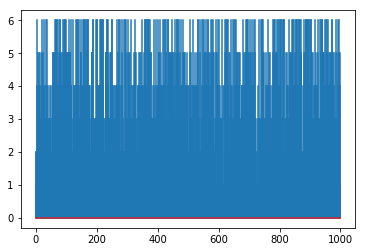

In [8]:
dice = Random_Variable('dice', values, probabilities)
samples = dice.sample(1000)
plt.stem(samples, markerfmt= ' ')

Let's now look at a histogram of these generated samples. Notice that even with 500 samples the bars are not equal length so the calculated frequencies are only approximating the probabilities used to generate them 

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


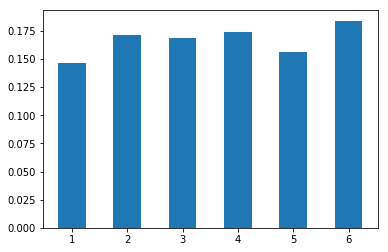

In [9]:
plt.figure()
plt.hist(samples,bins=[1,2,3,4,5,6,7],normed=1, rwidth=0.5,align='left');

Let's plot the cumulative histogram of the samples 

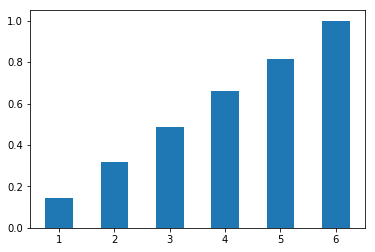

In [10]:
plt.hist(samples,bins=[1,2,3,4,5,6,7],normed=1, rwidth=0.5,align='left', cumulative=True);

Let's now estimate the frequency of the event *roll even number* in different ways. 
First let's count the number of even numbers in the generated samples. Then let's 
take the sum of the counts of the individual estimated probabilities. 


In [ ]:
# we can also write the predicates directly using lambda notation 
samples = dice.sample(500)
est_even = len([x for x in samples if x%2==0]) / len(samples)

In [ ]:
est_2 = len([x for x in samples if x==2]) / len(samples)
est_4 = len([x for x in samples if x==4]) / len(samples)
est_6 = len([x for x in samples if x==6]) / len(samples)
print(est_even)
# Let's print some estimates 
print('Estimates of 2,4,6 = ', (est_2, est_4, est_6))
print('Direct estimate = ', est_even) 
print('Sum of estimates = ', est_2 + est_4 + est_6)
print('Theoretical value = ', 0.5)

est_2 = 0 
for x in samples: 
    if x == 2: est_2 = est_2 + 1 
print(est_2/len(samples))


Notice that we can always estimate the probability of an event by simply counting how many times it occurs in the samples of an experiment. However if we have multiple events we are interested in then it can be easier to calculate the probabilities of the values of invdividual random variables and then use the rules of probability to estimate the probabilities of more complex events. 


## Sidenote: A probabilistic view of machine learning 


The basic recipe: 

* Describe how the data is generated and the assumptions you make using a probabilistic model 
* Estimate the parameters of the probabilistic model using available data (the learning part) 
* Use the estimated probabilistic model to perform various tasks. 
* Evaluate how well the model performs 


Some important observations: 

* Understanding notation in addition to the underlying concepts is important 
* Separating model from inference 
* Understanding the connection between statistics and probability 
* Thinking the generative way 
* Probabilistic modeling is all about how to calculate probabilities of events that are “hard” to estimate from probabilities of events that are “easier” to estimate 
* Focus on the basic concepts and don’t get bogged down in the implementation details and the multiple variants 
* Misleading use of language is frequently why probability problems can be difficult (for example Monty Hall). In most applications that’s not a problem.



## Joint Probability Distribution

Complete set of RVs used to describe the problem can be represented as
the joint probability distribution. For example the joint distribution 
$P(Weather,Raincoat, Season)$ can be represented as a $2 x 2 x 4$ table. 

### Marginal, joint and conditional 




|  ---   | CSC         | SENG        |
|--------| ----------- | ----------- |
|CSC421  |  150        | 50          |
|SENG350 |  80         | 20          |


\begin{align*} 
& P(\mbox{X is CSC}) = \frac{150+80}{150+80+50+20} = \frac{230}{300} \approx 0.77  \\
& P(\mbox{X is SENG and X in CS421}) = \\ 
& P(SENG, CSC421) = \frac{50}{300} \approx 0.17 \\ 
& P(\mbox{X is SENG if we know that X is in CSC421}) = \\ 
& P(SENG | CSC421) = \frac{50}{200} = 0.25 
\end{align*} 









## Inference 

When we have a probabilistic model we can make predictions, learn about the values of some random variables given the values of others, and in general, answer any possibly questions that can be stated about the random variables. The probablistic model expresses the set of assumptions we are making about the problem we are tryng to solve and our uncertainty about them is expressed through probabilities. Typically we will know the values of some random variables in our model (evidene) and based on this knowledge we will want to infer something about the probability distribution of some other variables.

## Product Rule 

We have seen that: 
* $P(hasLyrics,genre) = P(genre)P(hasLyrics/genre)$ 

This is an example of the product rule: P(A,B) = P(A)P(B|A).

## Sum Rule 

We can sum the joint probabilities for all possible values of genre to “eliminate” that variable. 

* $\sum_{hasLyrics} P(hasLyrics,genre = country) = P(genre = country)$. 

More generally using short-hand notation we can express that this holds for all values of genre : 

* $\sum_P{hasLyrics} P(hasLyrics,genre) = P(genre)$.


More generally the sum rule of probability states: $\sum_{B} P(A) = P(A,B)$ 

In this context, the distribution $P(A)$ is known as the marginal distribution for $A$ and the act of summing out $B$ is called marginalisation.



## Sum and product rules 

The sum and product rules are very general. They apply not just when $A$ and $B$ are binary random variables, but also when they are multi-state random variables, and even when they are continuous (in which case the sums are replaced by integrations). Furthermore, A and B could each represent sets of several random variables. For example if $B = C,D$: 

* $P(A,C,D) = P(A)P(C,D|A)$ 
* $P(A) = \sum_{C} \sum_{D} P(A,C,D)$

## Inference using full joint distribution


Let's consider another example where the full joint distribution $2 x 2 x 2$ is given. 



|---| toothache and catch    | toothache and not catch | not toothache and catch | not toothache and not catch | 
|---|-------   | ----------| ------| ----------|
|cavity | 0.108 | 0.012 | 0.072 | 0.008 | 
| not cavity | 0.016 | 0.064 | 0.144 | 0.576 | 


Direct way to evalute the probability of any proposition: 
* Identify the possible worlds in which a proposition is true and add up their probabilities 
* $P(cavity \lor toothache) = 0.108 + 0.012 + 0.072 + 0.008 + 0.016+ 0.064 = 0.28$ 
* **Marginal probability** of cavity: 
* $P(cavity) = 0.108 + 0.012 + 0.072 + 0.008 = 0.2$ 



## Conditional probabilities 

We explore conditional probabilities using an example from music. Imagine that you have a collection of songs consisting of two genres: country and jazz. Some songs have lyrics and some have not i.e they are instrumental. It makes sense that the probability of a song being instrumental depends on whether the song is jazz or country. This can be modeled through conditional probabilities.

We can simulate the generation process of conditional probabilities by appropriately sampling from three random variables.

Suppose we introduce another random variable hasLyrics with two values: no and yes. We expect that more country songs will have lyrics than jazz songs. That means that the probability distribution of hasLyrics depends on whether the genre is country or jazz. This is known as a conditional probability distribution and is notated as follows: $P(hasLyrics = no/genre = jazz) = 0.9$ This implies that $P(hasLyrics = yes|genre = jazz) = 0.1$

If genre = country then we have: $P(hasLyrics = no|genre = country) = 0.2$ We can use the short-hand notation $P(hasLyrics|genre)$ to denote the conditional probability distribution that in this case can be specified by providing four probabilities (or two using normalization). We will call these numbers and in general any numbers used to “specify” a particular probabilistic model parameters and use $\theta$ to denote a vector containing them.

We can display all the relevant probabilities using a conditional probability table. Notice that the sum of row entries must be equal to 1 but NOT the sum of column entries. 

| Genre/Lyrics | no  | yes |
|--------------|-----|-----|
| country      | 0.2 | 0.8 |
| jazz         | 0.9 | 0.1 |



## Independence and conditional independence 

Let's look at another example: 
<br> 
$A$ and $B$ are independent iff $P(A | B) = P(A)$ or $P(B|A) = P(B)$ or $P(A,B) = P(A) P(B)$

Absolute independence is powerful but rare. 


* $P(catch | toothache, cavity) = P(catch| cavity)$
* $P(catch | toothache, not cavity) = P(catch| not cavity)$ 

Catch is conditionally independent of Tootchache given Cavity (note the use of capital letters to indicate random variables: 

* $P(Catch | Toothache, Cavity) = P(Catch|Cavity)$


**MOST BASIC AND ROBUST FORM OF KNOWLEDGE ABOUT UNCERTAINTY**



**Note about notation** 

Frequently when notating a conditional probablity distribution the short hand $P(hasLyrics|genre)$ is used. Conceptually this expands to all possible combinations of values of the two random variables involved. Also some times when the values of random variables in a problem are unique the name of the random variable is omitted i.e P(country) instead of P(genre = country). It is important to keep in mind these conventions as our examples get more complicated.


In [11]:
# samples to generate 
num_samples = 1000

## Prior probabilities of a song being jazz or country 
values = ['country', 'jazz']
probs = [0.7, 0.3]
genre = Random_Variable('genre',values, probs)


# conditional probabilities of a song having lyrics or not given the genre 
values = ['no', 'yes']
probs = [0.9, 0.1] 
lyrics_if_jazz = Random_Variable('lyrics_if_jazz', values, probs)

values = ['no', 'yes']
probs = [0.2, 0.8]
lyrics_if_country = Random_Variable('lyrics_if_country', values, probs)

# conditional generating proces first sample prior and then based on outcome 
# choose which conditional probability distribution to use 

random_lyrics_samples = [] 
for n in range(num_samples): 
    # the 1 below is to get one sample and the 0 to get the first item of the list of samples 
    random_genre_sample = genre.sample(1)[0]
    # depending on the outcome of the genre sampling sample the appropriate 
    # conditional probability 
    if (random_genre_sample == 'jazz'): 
        random_lyrics_sample = (lyrics_if_jazz.sample(1)[0], 'jazz')
        # random_lyrics_sample = (lyrics_if_jazz.sample(1)[0])

    else: 
        random_lyrics_sample = (lyrics_if_country.sample(1)[0], 'country')
        # random_lyrics_sample = (lyrics_if_country.sample(1)[0])

    random_lyrics_samples.append(random_lyrics_sample)

# output 1 item per line and output the first 20 samples 
for s in random_lyrics_samples[0:100]: 
    print(s)

('yes', 'country')
('yes', 'country')
('no', 'jazz')
('no', 'country')
('yes', 'country')
('yes', 'country')
('no', 'country')
('no', 'jazz')
('no', 'jazz')
('yes', 'country')
('yes', 'country')
('no', 'country')
('no', 'country')
('no', 'jazz')
('yes', 'country')
('no', 'jazz')
('no', 'country')
('yes', 'country')
('no', 'jazz')
('yes', 'jazz')
('no', 'country')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('yes', 'country')
('no', 'jazz')
('yes', 'country')
('yes', 'country')
('no', 'country')
('no', 'country')
('no', 'jazz')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('no', 'jazz')
('yes', 'country')
('yes', 'country')
('no', 'jazz')
('yes', 'country')
('no', 'jazz')
('yes', 'country')
('yes', 'country')
('yes', 'country')
('no', 'country')
('yes', 'country')
('yes', 'country')
('no', 'jazz')
('yes', 'country')
('yes', 'country')
('no', 'jazz')
('no', 'country')
('yes', 'country')
('yes', 'country')
('yes', 'coun

Notice that we have generated samples of whether the song has lyrics or not. Above I have also printed the associated genre label. In many probabilistic modeling problems some information is not available to the observer. For example we could be provided only the yes/no outcomes and the genres could be "hidden".

Now let's use these generated samples to estimate probabilities of the model. Basically we pretend that we don't know the parameters and estimate them directly by frequency counting through the samples we generated.

In [12]:
# First only consider jazz samples 
jazz_samples = [x for x in random_lyrics_samples if x[1] == 'jazz']
for s in jazz_samples[0:20]: 
    print(s)

('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('yes', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')
('no', 'jazz')


Now that we have selected the samples that are jazz we can simply count the lyrics yes and lyrics no entries and divide them by the total number of jazz samples to get estimates of the conditional probabilities. Think about the relationships: we can use the data to estimate the parameters of a model (learning), we can use the model to generate samples (generation), and we can use the model to calculate probabilities for various events (inference).

In [13]:
est_no_if_jazz = len([x for x in jazz_samples if x[0] == 'no']) / len(jazz_samples)
est_yes_if_jazz = len([x for x in jazz_samples if x[0] == 'yes']) / len(jazz_samples)
print(est_no_if_jazz, est_yes_if_jazz)

0.9207920792079208 0.07920792079207921


We have seen in the slides that the probability of a song being jazz if we know that it is instrumental is 0.66.$$
P(genre = jazz | hasLyrics = no) = \frac{0.3 * 0.9}{0.3 * 0.9 + 0.7 * 0.2} = 0.66
$$

This is based on our knowledge of probabilities. If we have some data we can also estimate this probability directly. This is called approximate inference in contrast to the exact inference of $0.66$. When problems become complicated exact inference can become too costly to compute while approximate inference can provide reasonable answers much faster. We will see that later when examining probabilistic graphical models. As you can see in this case both the exact and approximate inference probability estimates are relatively close.

In [14]:
no_samples = [x for x in random_lyrics_samples if x[0] == 'no']
est_jazz_if_no_lyrics = len([x for x in no_samples if x[1] == 'jazz']) / len(no_samples)
print(est_jazz_if_no_lyrics)

0.6473317865429234


Recall that The process of obtaining revised probability distributions after the values of some random variables have been observed, is called inference. Let’s look at an example. We know that the probability of a song is jazz is $30\%$. Suppose that we observe that the song does not have lyrics. How does this evidence affect the probability that the song is jazz ? We have:


* $P(genre = jazz|hasLyrics = no) = \frac{0.3 ∗ 0.9}{0.3∗0.9+0.7∗0.2} \approx 0.66 $ 


Notice that this posterior probability after incorporating evidence is more than twice the original prior probability.

## Bayes Rule 

* $P(a|b) = P(b|a) P(a) / P(b) $ 

How can you prove it ? 

In distribution form (random variables - basically a template generating specific equations):  
* $P(A|B) = P(B|A) P(A) | P(B)$

Diagnostic probability from causal probability

* $P(Cause |Effect) = P(Effect|Cause) P(Cause) / P(Effect)$
* M menigitis, S stiff neck with: 

* $P(M) = 0.0001, P(S|M) = 0.8 P(S) = 0.1 P(M|S) = ?$

* Why is this useful ? Are diagnostic rules or causal rules harder to estimate ? 



## Conditional Probability Notation 

\begin{eqnarray}
P(X = x_1, Y = y_1) = P(X = x_1 / Y = y_1) P(Y=y1) \\ 
P(X = x_1, Y = y_2) = P(X = x_1 / Y = y_2) P(Y=y2) \\ 
\dots 
\end{eqnarray}
can be combined with the notation denoting a set of equations: 
\begin{equation} 
{\bf P}(X,Y) = {\bf P}(X/Y) {\bf P}(Y)
\end{equation} 




## Bayes example 

Suppose $C$ is a rv corresponding to people with covid in a population 
and $O$ is a rv corresponding to a particular age group (let's say above 70). 
We have the following data: 
$P(C) = 0.001$, $P(O|C) = 0.9$, $P(O|\hat C)=0.21$. P(C|O) corresponds to the probability of getting covid if you are old and can be calculated using the Bayes theorem: 

\begin{equation} 
P(C/O) = \frac{P(O/C)P(C)}{P(O)} = \frac{0.0009}{0.9 * 0.001 + 0.21 * 0.999} = 0.0043 
\end{equation} 

**NOTE: these numbers are made up and are not connected to actual Covid data**


Bayes theorem allows us to ``choose'' in a particular problem the
conditional probabilities that are easier to calculate from data. For example it
is easier to obtain the probability that someone who has covid 
is old than the probability that someone who is old has lung covid. 
It also allows us to quickly update probabilities when knowledge about the problem 
changes. For example suppose that the number of cases increase significantly after 
relaxing some public health measures. This for example could affect $P(C)$ without affecting the other numbers. 




## Naïve Bayes Model 

Commonly occuring pattern in which a single cause directly influences a number of effects all of which are conditionally independent. 


<img src="images/naive_bayes_net.png" width="60%"/>



## Bayes Classification 


* $P(Y/X) = P(X/Y)P(Y) P(X) $ 

where Y is the class label and X is the feature vector. Notice that this is a set of equations, one for each class label in Y. Therefore there will be L posterior probabilities one for each class. To classify a test instance a Bayesian classifier computes these posterior probabilities and selects the class label corresponding to the maximum posterior. Main challenge becomes how to estimate P(X/Y) from the labeled training samples. For each class the corresponding training samples are used to estimate the parameters of the corresponding pdfs.

## Bayes Classification 

We look at the problem of classifying songs to three genres (rap, rock and country) based on a simple binary bag of words representation. First we load the data and then we take a look at it. Using our implementation of discrete random variables we generate new random songs. Finally we show how classification can be performed using Bayes Rule. The data comes for the lyrics of songs from the Million Song DataSet and was created for an assignment in my course on MIR.

## Data layout and visualization

The data layout and the way the classifier is implemented is not general and not optimal but done for pedagogical purposes. Each genre consists of 1000 tracks and the matrix containing the data is ordered by genre. That way the instances corresponding to a genre can easily be found by the index without having to check the class label as would be the case with a general classifier.

We have created a dictionary of 30 words by taking the 10 "best" words based on tf-idf score for each genre. Each track is represented by a binary vector (a row in the matrix) with ones for dictionary words that are in the track and 0 for words that are not. So the matrix is 3000 instances (3 * 1000 per genre) by 30 for each word in the dictionary. When visualized one can observe the block structure that shows that the the rap tracks have a lot of words from the first 10 words in the dictionary that are characteristic of rap.

**NOTE** the data is conveniently arranged for this visualization. In an actual problem the rows of this matrix would be shuffled and the block structure would not be visible. 

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pickle 
import numpy as np


# load some lyrics bag of words data, binarize, separate matrix rows by genre 
data = np.load('data/data.npz', allow_pickle=True)

(1000, 30) (1000, 30) (1000, 30)


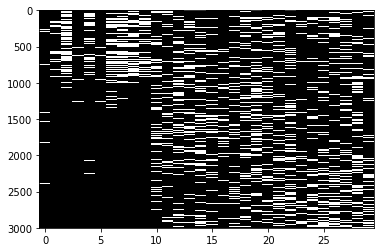

In [16]:
a = data['arr_0']
a[a > 0] = 1
labels = np.load('data/labels.npz', allow_pickle=True)
labels = labels['arr_0']
dictionary = pickle.load(open('data/dictionary.pck','rb'), encoding='latin1')
word_indices = [  41, 1465,  169,  217, 1036,  188,  260,  454,  173,  728,  163,
        151,  107,  142,   90,  141,  161,  131,   86,   73,  165,  133,
         84,  244,  153,  126,  137,  119,   80,  224]
words = [dictionary[r] for r in word_indices]

# binary row vectors separate by genre (rap, rock, country)
ra_rows = a[0:1000,:]
ro_rows = a[1000:2000,:]
co_rows = a[2000:3000,:] 
print(ra_rows.shape, ro_rows.shape, co_rows.shape)
plt.imshow(a, aspect='auto', cmap='gray')

### Calculating the 30-dimensional word probability vector for each genre


Let's calculate the word probability vector for each genre and then look at the most probable words for each genre in our data as well as how particular songs are represented as bag of words. We can calculate the probabilities of each word in the dictionary for the songs in each genre by summing the columns of the part of the matrix that corrsponds to each genre. As some words might not appear at all I have added 1.0 to both the numerator and denominator. This is a simple form of what's called additive smoothing which is a common technique to avoid zeros for any class conditional probabilities that would lead to the whole likelihood being zero.

In [17]:
# calculate word counts for each genre 
word_probs_ra = (ra_rows.sum(axis=0).astype(float) + 1.0) / (len(ra_rows)+1.0)
word_probs_ro = (ro_rows.sum(axis=0).astype(float) + 1.0) / (len(ro_rows)+1.0)
word_probs_co = (co_rows.sum(axis=0).astype(float) + 1.0) / (len(co_rows)+1.0)

# Let's llok at the word probabitites for rap music 
for w in zip(word_probs_ra, words): 
    print(w)
print('------')
for w in zip(word_probs_ro, words): 
    print(w)

(0.08791208791208792, 'de')
(0.18581418581418582, 'niggaz')
(0.43956043956043955, 'ya')
(0.06293706293706294, 'und')
(0.2827172827172827, 'yall')
(0.057942057942057944, 'ich')
(0.4125874125874126, 'fuck')
(0.5084915084915085, 'shit')
(0.4115884115884116, 'yo')
(0.3126873126873127, 'bitch')
(0.1798201798201798, 'end')
(0.11688311688311688, 'wait')
(0.17182817182817184, 'again')
(0.1968031968031968, 'light')
(0.23276723276723277, 'eye')
(0.12087912087912088, 'noth')
(0.11188811188811189, 'lie')
(0.14185814185814186, 'fall')
(0.21478521478521478, 'our')
(0.16283716283716285, 'away')
(0.17382617382617382, 'gone')
(0.26973026973026976, 'good')
(0.22477522477522477, 'night')
(0.0959040959040959, 'blue')
(0.18981018981018982, 'home')
(0.1838161838161838, 'long')
(0.24175824175824176, 'littl')
(0.2137862137862138, 'well')
(0.16483516483516483, 'heart')
(0.14185814185814186, 'old')
------
(0.03796203796203796, 'de')
(0.006993006993006993, 'niggaz')
(0.04595404595404595, 'ya')
(0.031968031968031

### Checking out the words in some songs using the binary representation

Each row of the feature matrix contains ones for each word that is present in the song. We can view the words of 
any particular song by mapping these ones using the dictionary of words. Let's view the words in the 20th track (row of the matrix) of each genre and then look at track 250.

In [18]:
#let's look at the bag of words for three particular songs 
track_id = 20
print(track_id)
print("RAP for trackid:",[words[i] for i,r in enumerate(ra_rows[track_id]) if r==1])
print("ROCK for trackid:",[words[i] for i,r in enumerate(ro_rows[track_id]) if r==1])
print("COUNTRY for trackid:",[words[i] for i,r in enumerate(co_rows[track_id]) if r==1])

track_id = 250 
print(track_id)
print("RAP for trackid:",[words[i] for i,r in enumerate(ra_rows[track_id]) if r==1])
print("ROCK for trackid:",[words[i] for i,r in enumerate(ro_rows[track_id]) if r==1])
print("COUNTRY for trackid:",[words[i] for i,r in enumerate(co_rows[track_id]) if r==1])

20
RAP for trackid: ['ya', 'yo', 'end', 'wait', 'our', 'old']
ROCK for trackid: ['again', 'light', 'fall', 'our', 'away', 'good', 'night', 'blue', 'long', 'well']
COUNTRY for trackid: ['long', 'well', 'old']
250
RAP for trackid: ['niggaz', 'ya', 'yo', 'bitch', 'away', 'home', 'long', 'heart']
ROCK for trackid: ['fuck', 'noth', 'lie', 'gone']
COUNTRY for trackid: ['yall', 'wait', 'our', 'good', 'long', 'littl', 'well']


In [19]:
# let's look at the k most probable words for each genre based on the data we have 
k = 5
[[words[x] for x in np.argpartition(word_probs_ra, -k)[-k:]],
 [words[x] for x in np.argpartition(word_probs_ro, -k)[-k:]],
 [words[x] for x in np.argpartition(word_probs_co, -k)[-k:]]]

[['bitch', 'ya', 'shit', 'yo', 'fuck'],
 ['our', 'heart', 'night', 'away', 'eye'],
 ['littl', 'long', 'well', 'heart', 'night']]

### Generating random songs based on our simplified representation

Now let's generate some random songs represented as bag of words using the calculated word probabilities for each genre. This way we can understand better the assumptions and simplifications of this model. I simply generate 30 random number and then depending on the class-conditional probabilities for a particular genre if the number is great than the random number the corresponding word is selected for generation. This gives us a clear idea of what assumptions this Binomial Naive Bayes classifier makes. Running the cell multiple times show the variation we get from this very simple model.

In [ ]:
print('Random rap', [w for (i,w) in enumerate(words) if np.greater(word_probs_ra, np.random.rand(30))[i]])
print('Random rock', [w for (i,w) in enumerate(words) if np.greater(word_probs_ro, np.random.rand(30))[i]])
print('Random country', [w for (i,w) in enumerate(words) if np.greater(word_probs_co, np.random.rand(30))[i]])

### Using the calculated word probabilities to make a classifier

Now let's look at classifying songs using a naive Bayes Bernoulli classifier. When the representation is binary vectors indicating absense or presence of words it is called a Bernoulli Naive Bayes. If the times a word appears in a document affect the classification it is called a Multinomial text classifier.

To make a classification decision we simply calculate the likelihood for each genre independently by taking the products of the genre dependent word probabilities. The genere with the highest likelihood is selected as the predicted class. In a more realistic implementation log-likelihoods would be used to avoid problems with small numbers. Notice that when a word is absent the probability it is absent (1 - the probability it is present) is used.

In [21]:
# calcuate likelihood separately for each word 
# using naive bayes assumption and multiply 
# typically a sum of log-likelihoods is used 
# rather than a multiplication. 
def likelihood(test_song, word_probs_for_genre): 
    probability_product = 1.0 
    for (i,w) in enumerate(test_song): 
        if (w==1): 
            probability = word_probs_for_genre[i]
        else: 
            probability = 1.0 - word_probs_for_genre[i]
        probability_product *= probability 
    return probability_product

### Using the trained classifier to predict

Now that we have a function to compute the likelihood given the parameters of a particular model in this case the model parameters are the probabilities for each word. We have three models to compare one for each genre. Given a test song we compute the three likelihoods and select the largest. We can randomly select a track from the country rows and then apply our predict function to see what it does. If you run the cell multiple times you will see that for most country tracks the prediction is correct but mistakes are made occassionally.

In [22]:
def predict(test_song): 
    scores = [likelihood(test_song, word_probs_ra), 
             likelihood(test_song, word_probs_ro),
             likelihood(test_song, word_probs_co)]
    labels = ['rap', 'rock', 'country']
    return labels[np.argmax(scores)]


# predict a random country track 
track_id = np.random.randint(1000)
print("Random track id", track_id)
test_song = co_rows[track_id]
print(predict(test_song))

Random track id 414
country


### Performing a simple evaluation of our classifier


We can now write a function that given a test set and associated ground truth lables runs our Bernoulli classifier and calculates the associated classification accuracy. We can now check how well the classifier does for each subset of the data corresponding to the three genres. Using the data used to trained the classifier for testing as we do here is a methodological mistake and in a more realistic scenario or application a separate dataset would be used for testing and the processing could be repeated multiple times using a scheme like k-fold cross-validation. As the purpose of this notebook is to illustrate how probabilities are used to create a Naive Bayes classifier I don't bother with that.

In [23]:
def predict_set(test_set, ground_truth_label): 
    score = 0 
    for r in test_set: 
        if predict(r) == ground_truth_label: 
            score += 1
    # convert to percentage 
    return score / 10.0 



# Let's evaluate how well our classifier does on the training set 
# A more proper evaluation would utilize cross-validation 

print("Rap accuracy% = ", predict_set(ra_rows, 'rap'))
print("Rock accuracy% = ", predict_set(ro_rows, 'rock'))
print("Country accuracy% = ", predict_set(co_rows, 'country'))

Rap accuracy% =  74.9
Rock accuracy% =  63.1
Country accuracy% =  70.9


### Naive Bayes in general

This notebooks explores how a simple probabilistic model based on a binary representation for a bag of words can be used for classification. This is a toy example with a lot of assumptions and conventions that make things easier in terms of implementation. In an actual implementation the number of words in the dictionary would not be given but calculated from the data, the instances would be shuffled so to calculate the probabilities the class output field of every instance would have to be examined. The number of classes would not be fixed and loops for iterating over classes and over attributes would be written. In the computation of the likelihood a log-likelihood would be used instead and the list goes on. You can find more information about this in most textbook that describe Naive Bayes classifiers.

## Probabilistic Wumpus World 

* Pits cause breezes in neighbors
* Each square (except [1,1] ) contains a pit with probability 0.2
* Random variables P[i,j] for each square B[i,j] for each square
* Please work through examples from textbook




